In [1]:
import sys
#!{sys.executable} -m pip install pymongo
#!{sys.executable} -m pip install pyyaml
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install scipy
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install isoweek

In [2]:

import os
print(os.getcwd())
# Get Mongo database
from yaml import load
from pymongo import MongoClient
from getsecret import getsecret

client = MongoClient(getsecret("MONGODB_URI"))
db = client[getsecret("MOBILE_NAME")]
ext_client = MongoClient(getsecret("EXT_URI"))

ext_db = ext_client[getsecret("DB_NAME")]
# Get all synced accounts and their respective users.
import urllib.request as req
import json
accounts = json.loads(req.urlopen("http://localhost:5000/synced_emails").read().decode("utf-8"))


### CONSTANTS ###
INTENSITY = "intensity"
TOTAL_TIME = "total_time"
ANDROID = "android"
HASH = "email_hash"
GOALS = "goals"
FREQ_GOALS = "freq_goals"
INFREQ_GOALS = "infreq_goals"
OTHER_TIME = "other_time"
FREQ_TIME ="freq_time"
GOAL_TIME = "goal_time"
TARGET_TIME = "target_time"
BROWSER = "browser"
BROWSER_DOMAIN = "browser_domain"
GOAL_TIMES = "goal_frequency_days"
FREQ_GOALS = "freq_goals"
INFREQ_GOALS = "infreq_goals"
BROWSER = "browser"
FREQUENCY = "frequency"
TIME = "time"
GOAL = "goal"
SPEND_LESS_TIME_LENGTH = len("custom/spend_less_time_")
AVG_FREQ_TIME = "avg_freq_time"
AVG_INFREQ_TIME = "avg_infreq_time"
AVG_GOAL_TIME = "avg_goal_time"
UNPRODUCTIVE_TIME = "unproductive_time"
PRODUCTIVE_TIME = "productive_time"
INFREQ_TIME = "infreq_time"
NUM_FREQ_GOALS = "num_freq_goals"
NUM_INFREQ_GOALS = "num_infreq_goals"
import time


### FUNCTIONS ###
# Get freq stats
# week -> goal -> freq
# Top-level-domain-names that are not pertinent to the application.
TLDs = ['aaa', 'abb', 'abc', 'ac', 'aco', 'ad', 'ads', 'ae', 'aeg', 'af', 'afl', 'ag', 'ai', 'aig', 'al', 'am', 'anz', 'ao', 'aol', 'app', 'aq', 'ar', 'art', 'as', 'at', 'au', 'aw', 'aws', 'ax', 'axa', 'az', 'ba', 'bar', 'bb', 'bbc', 'bbt', 'bcg', 'bcn', 'bd', 'be', 'bet', 'bf', 'bg', 'bh', 'bi', 'bid', 'bio', 'biz', 'bj', 'bm', 'bms', 'bmw', 'bn', 'bnl', 'bo', 'bom', 'boo', 'bot', 'box', 'br', 'bs', 'bt', 'buy', 'bv', 'bw', 'by', 'bz', 'bzh', 'ca', 'cab', 'cal', 'cam', 'car', 'cat', 'cba', 'cbn', 'cbs', 'cc', 'cd', 'ceb', 'ceo', 'cf', 'cfa', 'cfd', 'cg', 'ch', 'ci', 'ck', 'cl', 'cm', 'cn', 'co', 'com', 'cr', 'crs', 'csc', 'cu', 'cv', 'cw', 'cx', 'cy', 'cz', 'dad', 'day', 'dds', 'de', 'dev', 'dhl', 'diy', 'dj', 'dk', 'dm', 'dnp', 'do', 'dog', 'dot', 'dtv', 'dvr', 'dz', 'eat', 'ec', 'eco', 'edu', 'ee', 'eg', 'er', 'es', 'esq', 'et', 'eu', 'eus', 'fan', 'fi', 'fit', 'fj', 'fk', 'fly', 'fm', 'fo', 'foo', 'fox', 'fr', 'frl', 'ftr', 'fun', 'fyi', 'ga', 'gal', 'gap', 'gb', 'gd', 'gdn', 'ge', 'gea', 'gf', 'gg', 'gh', 'gi', 'gl', 'gle', 'gm', 'gmo', 'gmx', 'gn', 'goo', 'gop', 'got', 'gov', 'gp', 'gq', 'gr', 'gs', 'gt', 'gu', 'gw', 'gy', 'hbo', 'hiv', 'hk', 'hkt', 'hm', 'hn', 'hot', 'how', 'hr', 'ht', 'hu', 'ibm', 'ice', 'icu', 'id', 'ie', 'ifm', 'il', 'im', 'in', 'inc', 'ing', 'ink', 'int', 'io', 'iq', 'ir', 'is', 'ist', 'it', 'itv', 'jcb', 'jcp', 'je', 'jio', 'jlc', 'jll', 'jm', 'jmp', 'jnj', 'jo', 'jot', 'joy', 'jp', 'ke', 'kfh', 'kg', 'kh', 'ki', 'kia', 'kim', 'km', 'kn', 'kp', 'kpn', 'kr', 'krd', 'kw', 'ky', 'kz', 'la', 'lat', 'law', 'lb', 'lc', 'lds', 'li', 'lk', 'llc', 'lol', 'lpl', 'lr', 'ls', 'lt', 'ltd', 'lu', 'lv', 'ly', 'ma', 'man', 'map', 'mba', 'mc', 'md', 'me', 'med', 'men', 'mg', 'mh', 'mil', 'mit', 'mk', 'ml', 'mlb', 'mls', 'mm', 'mma', 'mn', 'mo', 'moe', 'moi', 'mom', 'mov', 'mp', 'mq', 'mr', 'ms', 'msd', 'mt', 'mtn', 'mtr', 'mu', 'mv', 'mw', 'mx', 'my', 'mz', 'na', 'nab', 'nba', 'nc', 'ne', 'nec', 'net', 'new', 'nf', 'nfl', 'ng', 'ngo', 'nhk', 'ni', 'nl', 'no', 'now', 'np', 'nr', 'nra', 'nrw', 'ntt', 'nu', 'nyc', 'nz', 'obi', 'off', 'om', 'one', 'ong', 'onl', 'ooo', 'org', 'ott', 'ovh', 'pa', 'pay', 'pe', 'pet', 'pf', 'pg', 'ph', 'phd', 'pid', 'pin', 'pk', 'pl', 'pm', 'pn', 'pnc', 'pr', 'pro', 'pru', 'ps', 'pt', 'pub', 'pw', 'pwc', 'py', 'qa', 'qvc', 're', 'red', 'ren', 'ril', 'rio', 'rip', 'ro', 'rs', 'ru', 'run', 'rw', 'rwe', 'sa', 'sap', 'sas', 'sb', 'sbi', 'sbs', 'sc', 'sca', 'scb', 'sd', 'se', 'ses', 'sew', 'sex', 'sfr', 'sg', 'sh', 'si', 'sj', 'sk', 'ski', 'sky', 'sl', 'sm', 'sn', 'so', 'soy', 'sr', 'srl', 'srt', 'st', 'stc', 'su', 'sv', 'sx', 'sy', 'sz', 'tab', 'tax', 'tc', 'tci', 'td', 'tdk', 'tel', 'tf', 'tg', 'th', 'thd', 'tj', 'tjx', 'tk', 'tl', 'tm', 'tn', 'to', 'top', 'tr', 'trv', 'tt', 'tui', 'tv', 'tvs', 'tw', 'tz', 'ua', 'ubs', 'ug', 'uk', 'uno', 'uol', 'ups', 'us', 'uy', 'uz', 'va', 'vc', 've', 'vet', 'vg', 'vi', 'vig', 'vin', 'vip', 'vn', 'vu', 'wed', 'wf', 'win', 'wme', 'wow', 'ws', 'wtc', 'wtf', 'xin', 'xxx', 'xyz', 'ye', 'you', 'yt', 'yun', 'za', 'zip', 'zm', 'zw']
def get_name(name, device):
    """
    @param name: goal name (package name for Android)
    @param device: "android" or "browser" or "browser_domain"
    @return name of goal with subdomains removed and goal annotation removed (i.e. spend_less_time)
    """
    if device == ANDROID  and name =="com.google.android.gm" or device == BROWSER and "gmail" in name:
        return "gmail"
    name = name.lower()
    if "custom" in name and device == BROWSER:
        # strip off the "custom/spend_less_time_"
        name = name[SPEND_LESS_TIME_LENGTH:]
    elif device == BROWSER:
        return name.split('/spend')[0]
    # Now we have to get juicy part of domain.
    subs = list(filter(lambda x: x != "android" and x != "google" and x != "apps" and x not in TLDs, name.split('.')))
    if device == ANDROID: 
        if len(subs) > 0:
            return subs[0]
        return name
    else:
        if len(subs) > 0:
            return subs[len(subs) - 1]    
        
def get_freq_stats(user):
    """
    Gets the frequency stats for browser.
    :param user user id 
    :return {week: {FREQ_GOALS: set(), INFREQ_GOALS: set()}}
    """
    stat = {}
    for setting in ext_db[user + "_synced:goal_frequencies"].find():
        val = json.loads(setting["val"])
        if val["algorithm"] == "isoweek_random":
            isoWeek = int(datetime.fromtimestamp(setting["timestamp_local"]/1000 + 8 * (60 ** 2)).isocalendar()[1])
            currentIsoWeek = int(datetime.fromtimestamp(time.time()).isocalendar()[1])
            for week in range(isoWeek, currentIsoWeek + 1):
                if str(week) not in stat:
                    stat[str(week)] = {FREQ_GOALS: set([]), INFREQ_GOALS: set([])}
                if val["onweeks"][week] == 1:
                    stat[str(week)][FREQ_GOALS].add(get_name(setting["key"], BROWSER))
                else:
                    stat[str(week)][INFREQ_GOALS].add(get_name(setting["key"], BROWSER))
    return stat


/home/geza/Dropbox/habitlab-data-analysis


In [3]:
%load_ext rpy2.ipython

In [4]:
# Now, let's get the mapping from productive apps to unproductive ones.
from statistics import mode, median, StatisticsError
name_to_prod = {}
with open('domain_to_productivity.json', 'r') as f:
    domain_to_prod = json.load(f)
    for domain in domain_to_prod:
        name = get_name(domain, BROWSER_DOMAIN)
        if name not in name_to_prod: 
            name_to_prod[name] = []
        name_to_prod[name].append(domain_to_prod[domain])
for name in name_to_prod:
    try:
        name_to_prod[name] = mode(name_to_prod[name])
    except StatisticsError:
        name_to_prod[name] = median(name_to_prod[name])

In [5]:
# Now, for each day, get frequency intensity
day_stats = []
import math
import moment
for account in accounts:
    curr_date = ""
    day_data = {PRODUCTIVE_TIME: 0, UNPRODUCTIVE_TIME: 0,INTENSITY: 0, INFREQ_GOALS: set([]), TARGET_TIME:0,
                FREQ_TIME: 0, TOTAL_TIME: 0, GOAL_TIME: 0, HASH: account["_id"], GOALS: set([]), 
                FREQ_GOALS: set([]), OTHER_TIME: 0 }
    for user in account[ANDROID]:
        for s in db[user+ "_sessions"].find({"enabled": {"$exists": True}, "duration": {"$lt": 86400}}):
            time = moment.unix(s["timestamp"])
            date = time.format("YYYY-MM-DD")
            if date != curr_date:
                if curr_date != "" and day_data[TOTAL_TIME] > 0 and len(day_data[GOALS]) > 0 and day_data[GOAL_TIME] > 0 and day_data[OTHER_TIME] > 0:
                    # Add obj and reset data
                    # take logs of time cuz time is log-norm distributed
                    # Have a more clever way of determining intensity: the % time spent on freq goals
                    for key in day_data:
                        if "time" in key and day_data[key] > 0:
                            day_data[key]= math.log(day_data[key])
                    day_stats.append(day_data)
                    day_data = {PRODUCTIVE_TIME: 0, UNPRODUCTIVE_TIME: 0,INTENSITY: 0, INFREQ_GOALS: set([]), TARGET_TIME:0,
                                FREQ_TIME: 0, TOTAL_TIME: 0, GOAL_TIME: 0, HASH: account["_id"], GOALS: set([]), 
                                FREQ_GOALS: set([]), OTHER_TIME: 0 }
                curr_date = date
            if "enabled" in s:
                if s["enabled"]:
                    day_data[GOALS].add(s["domain"])
                    if s["duration"] > 0:
                        if s["domain"] + "_domain_time" not in day_data:
                            day_data[s["domain"]+"_domain_time"] = 0
                        day_data[s["domain"]+"_domain_time"] += s["duration"]
                    if "frequent" in s and s["frequent"]:
                        day_data[FREQ_TIME] += s["duration"]
                        day_data[FREQ_GOALS].add(s["domain"])
                    elif "frequent" in s:
                        day_data[INFREQ_GOALS].add(s["domain"])
                    day_data[GOAL_TIME] += s["duration"]
                elif "target" in s and s["target"]:
                    day_data[TARGET_TIME] += s["duration"]                        
                else:
                    day_data[OTHER_TIME] += s["duration"]
            name = get_name(s["domain"], ANDROID)
            if name in name_to_prod:
                if name_to_prod[name] > 0:
                    day_data[PRODUCTIVE_TIME] += s["duration"]
                elif name_to_prod[name] < 0:
                    day_data[UNPRODUCTIVE_TIME] += s["duration"]
            day_data[TOTAL_TIME] += (s["duration"])
            

In [6]:
import matplotlib.pyplot as pyplot
pyplot.figure(12)
pyplot.hist([math.exp(day[TOTAL_TIME]) for day in day_stats if math.exp(day[TOTAL_TIME])], bins=20)

(array([2.090e+03, 1.846e+03, 1.072e+03, 7.520e+02, 5.050e+02, 3.020e+02,
        3.110e+02, 4.100e+01, 3.000e+00, 4.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([4.500000e+01, 1.259120e+04, 2.513740e+04, 3.768360e+04,
        5.022980e+04, 6.277600e+04, 7.532220e+04, 8.786840e+04,
        1.004146e+05, 1.129608e+05, 1.255070e+05, 1.380532e+05,
        1.505994e+05, 1.631456e+05, 1.756918e+05, 1.882380e+05,
        2.007842e+05, 2.133304e+05, 2.258766e+05, 2.384228e+05,
        2.509690e+05]),
 <a list of 20 Patch objects>)

In [7]:
import pandas as pd
INFREQ_TIME = "infreq_time"
data_frame_dict = { key: [] for key in day_stats[0] if "domain_time" not in key}
NUM_GOALS = "num_goals"
data_frame_dict[AVG_GOAL_TIME] = []
data_frame_dict[AVG_FREQ_TIME] = []
data_frame_dict[AVG_INFREQ_TIME] = []
data_frame_dict[NUM_GOALS] = []
data_frame_dict[INFREQ_TIME] = []
# Let's also count up the freq to see if they're roughly equal
field_stats = {}
print(len(day_stats))
for item in day_stats:
    if len(item[FREQ_GOALS]) > 0 and item[FREQ_TIME] != item[GOAL_TIME]:
        for key in item:

            if "domain_time" not in key:
                if key == INTENSITY:
                    data_frame_dict[key].append(len(item[FREQ_GOALS])/len(item[GOALS]))
                    #data_frame_dict[key].append(1-math.exp(item[FREQ_TIME])/math.exp(item[TOTAL_TIME]))
                else:
                    data_frame_dict[key].append((item[key]))
        data_frame_dict[AVG_GOAL_TIME].append(item[GOAL_TIME]/len(item[GOALS]))
        data_frame_dict[AVG_FREQ_TIME].append(item[FREQ_TIME]/len(item[FREQ_GOALS]))
        data_frame_dict[AVG_INFREQ_TIME].append(math.log(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]))/len(item[INFREQ_GOALS]))
        data_frame_dict[INFREQ_TIME].append(math.log(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME])))
        data_frame_dict[NUM_GOALS].append(len(item[GOALS]))
df = pd.DataFrame(data_frame_dict)
print(df)


#mean([len(item[GOALS]) for item in day_stats])
df.to_csv('effect_freq_time_spent_2018_09_10.csv')

6933
      productive_time  unproductive_time  intensity  \
0            7.313220           0.000000   0.333333   
1            4.430817           3.044522   0.500000   
2            5.541264           7.882692   0.333333   
3            5.899897           7.902857   0.666667   
4            5.680173           8.218787   0.666667   
5            6.274762           8.939974   0.800000   
6            4.859812           8.122371   0.250000   
7            7.121252           7.741968   0.333333   
8            6.720220           8.000685   0.500000   
9            5.356586           6.150603   0.500000   
10           5.789960           8.883502   1.000000   
11           6.496775           9.277719   0.750000   
12           6.448889           8.040769   0.666667   
13           6.413459           8.809863   0.750000   
14           5.241747           8.592672   0.750000   
15           4.418841           9.062188   0.200000   
16           4.663439           9.302828   0.800000   
17   

In [8]:
%%R -i df -w 5 -h 5 --units in -r 200

#install.packages('ez')
#install.packages('lme4')

library(lme4)
library(sjPlot)
library(lmerTest)
#library(ez)


/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "infreq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "freq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead

In [9]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_freq_time ~ intensity + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_freq_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 18120.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.9829 -0.5369 -0.0951  0.4516  4.5021 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 1.724    1.313   
 Residual               1.752    1.324   
Number of obs: 5008, groups:  email_hash, 568

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    6.90430    0.08654 1713.34234   79.79   <2e-16 ***
intensity     -5.71531    0.11525 4850.96559  -49.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.702


In [10]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_infreq_time ~ intensity + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_infreq_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 18830.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6097 -0.5358 -0.0730  0.4407  4.1506 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 1.677    1.295   
 Residual               2.053    1.433   
Number of obs: 5008, groups:  email_hash, 568

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 1.778e+00  9.001e-02 1.912e+03   19.75   <2e-16 ***
intensity   4.160e+00  1.242e-01 4.894e+03   33.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.727


In [11]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(unproductive_time ~ intensity + (1|email_hash) + (num_goals), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: unproductive_time ~ intensity + (1 | email_hash) + (num_goals)
   Data: df

REML criterion at convergence: 16210.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.6549 -0.3797  0.0872  0.5124  4.9330 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.291    1.514   
 Residual               1.113    1.055   
Number of obs: 5008, groups:  email_hash, 568

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 7.382e+00  9.714e-02 1.797e+03  75.996   <2e-16 ***
intensity   5.955e-02  9.312e-02 4.674e+03   0.639    0.523    
num_goals   1.550e-01  1.056e-02 4.999e+03  14.683   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr) intnst
intensity -0.507       
num_goals -0.510  0.003


In [12]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_infreq_time ~ avg_freq_time + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_infreq_time ~ avg_freq_time + (1 | email_hash)
   Data: df

REML criterion at convergence: 19846.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0419 -0.5898 -0.1753  0.4559  3.7644 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.046    1.430   
 Residual               2.513    1.585   
Number of obs: 5008, groups:  email_hash, 568

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    4.004e+00  8.684e-02  1.195e+03  46.112   <2e-16 ***
avg_freq_time -8.988e-03  1.377e-02  4.996e+03  -0.653    0.514    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
avg_freq_tm -0.617


In [13]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does total time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(total_time ~ intensity + (1|num_goals) + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: total_time ~ intensity + (1 | num_goals) + (1 | email_hash)
   Data: df

REML criterion at convergence: 11305.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.0462 -0.4169  0.1279  0.5795  3.2091 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.64931  0.8058  
 num_goals  (Intercept) 0.08752  0.2958  
 Residual               0.42728  0.6537  
Number of obs: 5008, groups:  email_hash, 568; num_goals, 20

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 9.951e+00  9.285e-02 2.522e+01 107.174   <2e-16 ***
intensity   2.151e-02  5.845e-02 4.721e+03   0.368    0.713    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.352


In [14]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ intensity + (1|email_hash) + (num_goals), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: goal_time ~ intensity + (1 | email_hash) + (num_goals)
   Data: df

REML criterion at convergence: 12598

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.1259 -0.4609  0.0752  0.5617  4.6448 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6358   0.7974  
 Residual               0.5744   0.7579  
Number of obs: 5008, groups:  email_hash, 568

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)  7.357e+00  6.158e-02  2.369e+03 119.470   <2e-16 ***
intensity   -4.557e-02  6.616e-02  4.806e+03  -0.689    0.491    
num_goals    2.295e-01  7.323e-03  4.841e+03  31.343   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr) intnst
intensity -0.570       
num_goals -0.563  0.006


In [15]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(other_time ~ intensity + (1|email_hash) + (num_goals), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: other_time ~ intensity + (1 | email_hash) + (num_goals)
   Data: df

REML criterion at convergence: 14032.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.2989 -0.4409  0.1150  0.5583  2.9693 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 1.2760   1.1296  
 Residual               0.7326   0.8559  
Number of obs: 5008, groups:  email_hash, 568

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 8.682e+00  7.594e-02 2.020e+03 114.332  < 2e-16 ***
intensity   1.682e-01  7.534e-02 4.722e+03   2.232   0.0257 *  
num_goals   3.750e-02  8.497e-03 5.004e+03   4.413 1.04e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr) intnst
intensity -0.525       
num_goals -0.526  0.004


In [16]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(target_time ~ intensity + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: target_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 20050.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9269 -0.1505 -0.0497 -0.0156  5.2904 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.476    1.574   
 Residual               2.582    1.607   
Number of obs: 5008, groups:  email_hash, 568

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)    0.7767     0.1045 1814.3224   7.436 1.59e-13 ***
intensity      0.1780     0.1398 4866.2977   1.273    0.203    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.705


In [17]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(infreq_time ~ intensity + (1|email_hash) + num_goals, data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: infreq_time ~ intensity + (1 | email_hash) + num_goals
   Data: df

REML criterion at convergence: 17274.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.7104 -0.4417  0.1030  0.5946  3.8212 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.8262   0.909   
 Residual               1.5578   1.248   
Number of obs: 5008, groups:  email_hash, 568

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    7.70552    0.09051 2699.45829   85.14   <2e-16 ***
intensity     -2.86106    0.10695 4957.05565  -26.75   <2e-16 ***
num_goals      0.23677    0.01133 3736.66363   20.90   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr) intnst
intensity -0.628       
num_goals -0.601  0.010


735fc385e38dd2166db9fdabff905b4a985c5ebc496708618fe3548dbafd2f8e


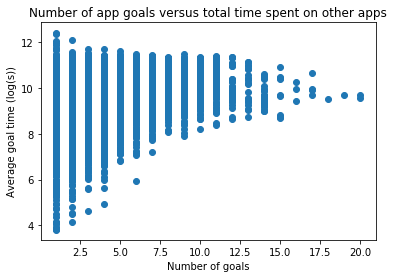

In [18]:
import matplotlib.pyplot as pyplot
import collections

most_active_users = {"": 0}
most_active_user = ""
for stat in day_stats:
    email = stat[HASH]
    if email not in most_active_users:
        most_active_users[email] = 0
    most_active_users[email] += 1
    if most_active_users[email] > most_active_users[most_active_user]:
        most_active_user = email
print(most_active_user)
pyplot.figure(43)
pyplot.title("Number of app goals versus total time spent on other apps")
pyplot.ylabel("Average goal time (log(s))")
pyplot.xlabel("Number of goals")
pyplot.scatter([len(stat[GOALS]) for stat in day_stats], [(stat[TOTAL_TIME]) for stat in day_stats])


In [19]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(other_time ~ intensity +  (1|email_hash) + (1|num_goals), data = df)
summary(results)

/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "infreq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "freq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: other_time ~ intensity + (1 | email_hash) + (1 | num_goals)
   Data: df

REML criterion at convergence: 14039.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.3168 -0.4436  0.1141  0.5641  3.0145 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 1.26884  1.1264  
 num_goals  (Intercept) 0.01213  0.1101  
 Residual               0.73252  0.8559  
Number of obs: 5008, groups:  email_hash, 568; num_goals, 20

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 8.952e+00  7.460e-02 6.457e+01 120.004   <2e-16 ***
intensity   1.415e-01  7.587e-02 4.392e+03   1.865   0.0623 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.553


In [20]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(target_time ~ avg_goal_time + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: target_time ~ avg_goal_time + (1 | email_hash)
   Data: df

REML criterion at convergence: 20051

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8667 -0.1567 -0.0475 -0.0135  5.3112 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.494    1.579   
 Residual               2.579    1.606   
Number of obs: 5008, groups:  email_hash, 568

Fixed effects:
               Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)   7.223e-01  1.046e-01 1.527e+03   6.905 7.35e-12 ***
avg_goal_time 6.698e-02  3.334e-02 4.874e+03   2.009   0.0446 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
avg_goal_tm -0.704


In [21]:
# see average change for time spent in goals vs. outside of goal when freq setting changes
from statistics import mean, StatisticsError
goal_time_change_stats = []
other_time_change_stats = []
user_stats = {}
max_time = 0
for day in day_stats:
    email = day[HASH]
    if day[HASH] not in user_stats:
        user_stats[email] = {FREQ_GOALS: set([]), INFREQ_GOALS: set([])}
    user_stats[email][FREQ_GOALS] = user_stats[email][FREQ_GOALS].union(day[FREQ_GOALS])
    user_stats[email][INFREQ_GOALS] = user_stats[email][INFREQ_GOALS].union(day[INFREQ_GOALS])
    for domain_time in day:
        if "_domain_time" in domain_time:
            domain = domain_time[:-len("_domain_time")]
            if domain not in user_stats[email]:
                user_stats[email][domain] = {"frequent_goal": [], "infrequent_goal": [], "frequent_other": [], "infrequent_other": []}
            if not (domain in day[FREQ_GOALS] and domain in day[INFREQ_GOALS]):
                freq = "frequent" if domain in day[FREQ_GOALS] else "infrequent"
                if day[domain_time] > max_time:
                    max_time = day[domain_time]
                    print(max_time)
                user_stats[email][domain][freq + "_goal"].append(day[domain_time])
                user_stats[email][domain][freq+"_other"].append(day[TOTAL_TIME] - day[domain_time])
for user in user_stats:
    for domain in user_stats[user][FREQ_GOALS].intersection(user_stats[user][INFREQ_GOALS]):
        if 0 not in user_stats[user][domain]["frequent_goal"] and 0 not in user_stats[user][domain]["infrequent_goal"]:
            try:
                mean_freq_goal = mean(user_stats[user][domain]["frequent_goal"])
                # print("frequent" + str(user_stats[user][domain]["frequent_goal"]))
                # print("infrequent  " + str(user_stats[user][domain]["infrequent_goal"]))
                goal_change = mean_freq_goal - mean(user_stats[user][domain]["infrequent_goal"])
                other_change = mean(user_stats[user][domain]["frequent_other"]) - mean(user_stats[user][domain]["infrequent_other"])
                goal_time_change_stats.append(goal_change)
                other_time_change_stats.append(other_change)
            except StatisticsError:
                pass

4.3694478524670215
8.339739766019143
8.733594061863055
9.11679862756782
9.914625296946584
10.663124474364906
11.05668271897453
11.340082840810044


In [22]:
# our next data set: goal_time, freq, goal, and email_hash
goal_stats_dict = {"app": [], "email": [], "time": [], "other_time": [], "frequency": []}
for day in day_stats:
    for key in day:
        if "domain_time" in key:
            domain = key[:-len("_domain_time")]
            if not (domain in day[FREQ_GOALS] and domain in day[INFREQ_GOALS]) and (domain in day[FREQ_GOALS] or domain in day[INFREQ_GOALS]):
                freq = "frequent" if domain in day[FREQ_GOALS] else "infrequent"
                goal_stats_dict["app"].append(domain)
                goal_stats_dict["email"].append(day[HASH])
                goal_stats_dict["time"].append(day[key])
                goal_stats_dict["other_time"].append(day[GOAL_TIME] - day[key])
                goal_stats_dict["frequency"].append(freq)
goal_freq_df = pd.DataFrame(goal_stats_dict)
#goal_freq_df.to_csv("goal_freq_df.csv")

In [23]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|app) + (1|email) , data = goal_freq_df)
summary(results)

/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ frequency + (1 | app) + (1 | email)
   Data: goal_freq_df

REML criterion at convergence: 110127.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.1143 -0.5412  0.1294  0.6555  3.7530 

Random effects:
 Groups   Name        Variance Std.Dev.
 app      (Intercept) 1.7951   1.340   
 email    (Intercept) 0.5155   0.718   
 Residual             2.6327   1.623   
Number of obs: 28339, groups:  app, 733; email, 617

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        5.239e+00  6.923e-02  9.459e+02  75.674  < 2e-16 ***
frequencyfrequent -6.516e-02  2.059e-02  2.813e+04  -3.165  0.00155 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.142


1459
0.5003427004797807
[-0.07520973040384085, 0.05303787857720849]


<BarContainer object of 2 artists>

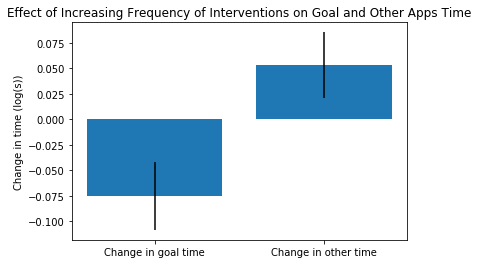

In [24]:
from scipy.stats import sem
pyplot.figure(32)
print(len(goal_time_change_stats))
pyplot.title("Effect of Increasing Frequency of Interventions on Goal and Other Apps Time")
pyplot.ylabel('Change in time (log(s))')
print(len([stat for stat in other_time_change_stats if stat > 0])/len(goal_time_change_stats))
print([mean(goal_time_change_stats), mean(other_time_change_stats)])
pyplot.bar(["Change in goal time", "Change in other time"], [mean(goal_time_change_stats), mean(other_time_change_stats)] , .8, yerr=[sem(goal_time_change_stats), sem(other_time_change_stats)])

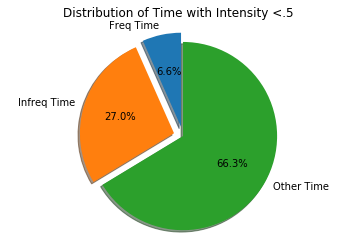

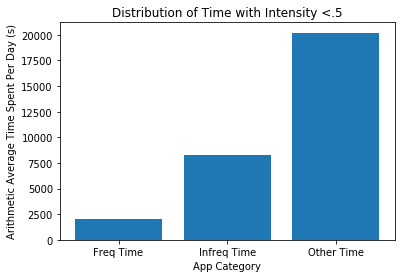

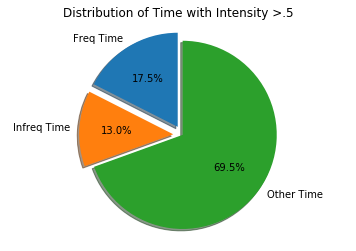

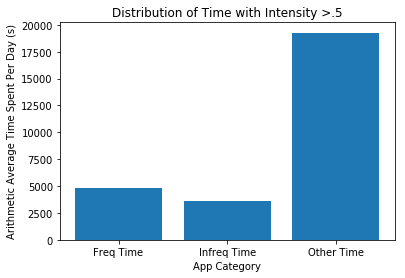

In [25]:

freq_time = [0,0]
infreq_time = [0,0]
other_time = [0,0]
num_days = [0, 0]
for day in day_stats:
    if len(day[FREQ_GOALS]) > 0 and len(day[INFREQ_GOALS]) > 0:
        intensity= len(day[FREQ_GOALS])/len(day[INFREQ_GOALS])
        if intensity <.5:
            num_days[0] += 1
            freq_time[0] += math.exp(day[FREQ_TIME])
            infreq_time[0] += math.exp(day[GOAL_TIME])-math.exp(day[FREQ_TIME])
            other_time[0] += math.exp(day[OTHER_TIME])
        elif intensity > .5:
            num_days[1] += 1
            freq_time[1] += math.exp(day[FREQ_TIME])
            infreq_time[1] += math.exp(day[GOAL_TIME])-math.exp(day[FREQ_TIME])
            other_time[1] += math.exp(day[OTHER_TIME])   
from functools import reduce
import numpy as np
for i in range(0,2):
    pyplot.figure(325 + i * 2 - 1)
    labels = 'Freq Time', 'Infreq Time', 'Other Time'
    sizes = [freq_time[i], infreq_time[i], other_time[i]]
    explode = (0.1, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    pyplot.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    pyplot.title("Distribution of Time with Intensity " + ("<" if i == 0 else ">") + ".5")
    pyplot.figure(325 + i * 2)
    pyplot.title("Distribution of Time with Intensity " + ("<" if i == 0 else ">") + ".5")
    pyplot.xlabel("App Category")
    pyplot.ylabel("Arithmetic Average Time Spent Per Day (s)")
    pyplot.bar(labels, list(map(lambda x: x/num_days[i], sizes)))
    pyplot.figure("Distribution of Time with Intensity")


-0.7246005263582466


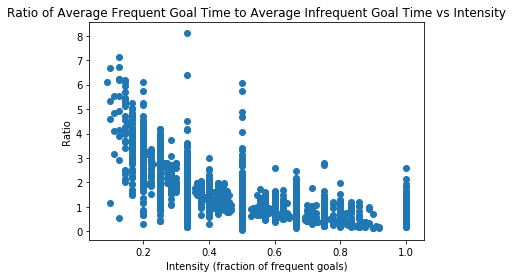

In [26]:
intensities = []
avg_freq_time = []
avg_infreq_time = []
ratio = []
for item in day_stats:
    if len(item[FREQ_GOALS]) > 0 and len(item[INFREQ_GOALS]) > 0 and math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]) > 3:
        avg_freq_time_pt = item[FREQ_TIME]/len(item[FREQ_GOALS])
        
        avg_infreq_time_pt = math.log(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]))/len(item[INFREQ_GOALS])
        if avg_freq_time_pt/avg_infreq_time_pt > 1000:
            print(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]))
            print(math.log(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME])))
            print(math.log(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]))/len(item[INFREQ_GOALS]))
            print(str(avg_freq_time_pt) + " " + str(avg_infreq_time_pt))
        intensity = len(item[FREQ_GOALS])/(len(item[FREQ_GOALS].union(item[INFREQ_GOALS])))
        if avg_freq_time_pt > 0 and avg_infreq_time_pt > 0:
            intensities.append(intensity)
            avg_freq_time.append(avg_freq_time_pt)
            avg_infreq_time.append(avg_infreq_time_pt)
            ratio.append((avg_freq_time_pt/avg_infreq_time_pt))
pyplot.figure(62426)
pyplot.title("Ratio of Average Frequent Goal Time to Average Infrequent Goal Time vs Intensity")
pyplot.xlabel("Intensity (fraction of frequent goals)")
pyplot.ylabel("Ratio")
pyplot.scatter(intensities, ratio)
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(intensities,ratio)
print(r_value)

In [27]:
# Get all browser user ids that have goal frequencies collection.
print ("getting collection names")
collection_names = ext_db.list_collection_names()
print("got collection names")
browser_user_ids = []
counter = 0
for name in collection_names:
    if counter % 100000 == 0:
        print(counter)
    counter += 1
    if "goal_frequencies" in name:
        browser_user_ids.append(name[:-len("_synced:goal_frequencies")])

getting collection names
got collection names
0
100000
200000


In [28]:
print(len(browser_user_ids))

1451


In [29]:

browser_days = []
import moment
import math
from time_utils import epoch_to_date
from datetime import datetime
import time
# Now the browser side of things!!
num_browser_users = len(browser_user_ids)
counter = 0
for user in browser_user_ids:
    # Get freq settings:
    counter += 1
    if int((counter + 1)/num_browser_users * 100) > int(counter/num_browser_users * 100):
        print(str(counter/num_browser_users * 100) + "%")
    user_stats = get_freq_stats(user)
    if len(user_stats) == 0:
        continue
    browser_day_map = {}
    for day_stat in ext_db[user+ "_synced:seconds_on_domain_per_day"].find({"key2":{"$gt": 930}}):
        # The key1 serves as a day. However, if we are going to compare same day stuffs for android.
        # We need to instead build day string from moment
        day = epoch_to_date(int(day_stat['key2']))
        if day not in browser_day_map:
            browser_day_map[day] = {}
        goal = get_name(day_stat['key'], BROWSER_DOMAIN)
        if goal:
            if goal + "_domain_time" not in browser_day_map or day_stat["val"] > browser_day_map[goal + "_domain_time"]:
                browser_day_map[day][goal + "_domain_time"] = day_stat["val"]
    for day in browser_day_map:
        day_data = { FREQ_TIME: 0, INFREQ_TIME: 0, INTENSITY: 0, INFREQ_GOALS: set([]),  TOTAL_TIME: 0, GOAL_TIME: 0, HASH:user, GOALS: set([]), FREQ_GOALS: set([]), OTHER_TIME: 0, GOAL_TIMES: []}
        # weirdly enough, datetime timestamps are seconds, not ms.
        isoWeek = str(datetime.fromtimestamp(moment.date(day).epoch() + 8 * (60 ** 2)).isocalendar()[1])
        # Add obj and reset data
        # take logs of time cuz time is log-norm distributed
        # First, count up all domain_times into TOTAL, GOAL, and OTHER
        if isoWeek not in user_stats:
            continue
        day_data[FREQ_GOALS] = user_stats[isoWeek][FREQ_GOALS]
        day_data[INFREQ_GOALS] = user_stats[isoWeek][INFREQ_GOALS]
        day_data[GOALS] = day_data[FREQ_GOALS].union(day_data[INFREQ_GOALS])
        if len(user_stats[isoWeek][FREQ_GOALS].intersection(user_stats[isoWeek][INFREQ_GOALS])) > 0:
            continue
        for key in browser_day_map[day]:
            if "_domain_time" in key:
                key_goal = key[:-len("_domain_time")]
                day_data[TOTAL_TIME] += int(browser_day_map[day][key])
                if key_goal in day_data[FREQ_GOALS] or key_goal in day_data[INFREQ_GOALS]:
                    frequent = "frequent" if key_goal in day_data[FREQ_GOALS] else "infrequent"
                    if key_goal in day_data[FREQ_GOALS]:
                        day_data[FREQ_TIME] += browser_day_map[day][key]
                    else:
                        day_data[INFREQ_TIME] += browser_day_map[day][key]
                    day_data[GOAL_TIMES].append({"frequency": frequent, "goal": key_goal, "time": browser_day_map[day][key]})
                    day_data[GOAL_TIME] += browser_day_map[day][key]
                else:
                    day_data[OTHER_TIME] += browser_day_map[day][key]
        for key in day_data:
            if "time" in key and day_data[key] > 0:
                day_data[key]= math.log(day_data[key])
        if len(day_data[FREQ_GOALS]) > 0 and len(day_data[INFREQ_GOALS]) > 0:
            day_data[AVG_FREQ_TIME] = day_data[FREQ_TIME]/len(day_data[FREQ_GOALS])
            day_data[AVG_INFREQ_TIME] = day_data[INFREQ_TIME]/len(day_data[INFREQ_GOALS])
            for goal_time in day_data[GOAL_TIMES]:
                    if goal_time[TIME] > 0:
                        goal_time[TIME] = math.log(goal_time[TIME])
            if len(day_data[FREQ_GOALS])+ len(day_data[INFREQ_GOALS]) > 0:
                day_data[INTENSITY] = len(day_data[FREQ_GOALS])/(len(day_data[FREQ_GOALS])+ len(day_data[INFREQ_GOALS]))
                browser_days.append(day_data)



0.9648518263266712%
1.9986216402481045%
2.963473466574776%
3.997243280496209%
4.962095106822881%
5.995864920744314%
6.960716747070986%
7.994486560992418%
8.959338387319091%
9.993108201240524%
10.957960027567196%
11.991729841488628%
12.9565816678153%
13.990351481736733%
14.955203308063405%
15.988973121984836%
16.95382494831151%
17.98759476223294%
18.952446588559614%
19.98621640248105%
20.951068228807717%
21.98483804272915%
22.949689869055824%
23.983459682977255%
24.948311509303927%
25.982081323225366%
26.94693314955203%
27.980702963473465%
28.945554789800138%
29.97932460372157%
30.94417643004824%
31.977946243969672%
32.94279807029635%
33.97656788421778%
34.94141971054445%
35.97518952446588%
36.940041350792555%
37.973811164713986%
38.938662991040665%
39.9724328049621%
40.93728463128877%
41.9710544452102%
42.93590627153687%
43.9696760854583%
44.934527911784976%
45.96829772570641%
46.93314955203308%
47.96691936595451%
48.93177119228119%
49.96554100620262%
50.99931082012405%
51.964162646450

In [30]:
import pandas as pd
# Dataframe to find effect of frequency on goal times
browser_goal_freq_dict = {HASH: [], TIME: [], GOAL: [], FREQUENCY: []}
for day in browser_days:
    for goal_time in day[GOAL_TIMES]:
        browser_goal_freq_dict[HASH].append(day[HASH])
        browser_goal_freq_dict[FREQUENCY].append(goal_time[FREQUENCY])
        browser_goal_freq_dict[TIME].append(goal_time[TIME])
        browser_goal_freq_dict[GOAL].append(goal_time[GOAL])
        
browser_goal_freq_df = pd.DataFrame(browser_goal_freq_dict)
print(browser_goal_freq_df)
browser_goal_freq_df.to_csv("2018-09-10-browser_goal_freq_df.csv")

                     email_hash      time       goal   frequency
0      883c1ba5c4e5472d2f8067d6  6.188264   facebook    frequent
1      d49e6ce9c7fadc10f3baf7bd  1.609438        www    frequent
2      d49e6ce9c7fadc10f3baf7bd  5.609472        www    frequent
3      d49e6ce9c7fadc10f3baf7bd  6.045005        www    frequent
4      601ef212e501d1cdccebf63b  7.918992   facebook  infrequent
5      601ef212e501d1cdccebf63b  7.379632    twitter    frequent
6      601ef212e501d1cdccebf63b  5.971262     amazon  infrequent
7      601ef212e501d1cdccebf63b  8.535033   facebook  infrequent
8      601ef212e501d1cdccebf63b  7.591357    twitter    frequent
9      9e63d7e9d250c795b9c657e8  3.761200    twitter  infrequent
10     9e63d7e9d250c795b9c657e8  5.697093   facebook  infrequent
11     9e63d7e9d250c795b9c657e8  6.744059     reddit    frequent
12     9e63d7e9d250c795b9c657e8  7.817625    youtube    frequent
13     9e63d7e9d250c795b9c657e8  6.028279   facebook  infrequent
14     9e63d7e9d250c795b9

In [31]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200
library(lme4)
library(sjPlot)
library(lmerTest)
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|email_hash) + (1|goal), data = browser_goal_freq_df)
summary(results)

/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ frequency + (1 | email_hash) + (1 | goal)
   Data: browser_goal_freq_df

REML criterion at convergence: 63775.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5869 -0.5137  0.1457  0.6675  2.9528 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5711   0.7557  
 goal       (Intercept) 0.5681   0.7537  
 Residual               2.4803   1.5749  
Number of obs: 16571, groups:  email_hash, 1003; goal, 410

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        5.346e+00  6.206e-02  5.134e+02  86.137   <2e-16 ***
frequencyfrequent -8.522e-02  2.611e-02  1.625e+04  -3.264   0.0011 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.213


In [32]:
print(time)

<module 'time' (built-in)>


In [33]:
FREQ_FRAC_TIME = "freq_frac_time"
INFREQ_FRAC_TIME = "infreq_frac_time"
AVG_GOAL_TIME= "avg_goal_time"
intensity_dict ={INTENSITY: [], HASH: [], TOTAL_TIME: [], GOAL_TIME: [], OTHER_TIME: [], AVG_GOAL_TIME: [],
                AVG_FREQ_TIME: [], FREQ_FRAC_TIME: [], INFREQ_FRAC_TIME: [], AVG_INFREQ_TIME: [], NUM_FREQ_GOALS: [], NUM_INFREQ_GOALS: [], NUM_GOALS: []}
for day in browser_days:
    for key in intensity_dict:
        if key not in [AVG_GOAL_TIME, NUM_FREQ_GOALS, NUM_INFREQ_GOALS, NUM_GOALS, FREQ_FRAC_TIME, INFREQ_FRAC_TIME]:
            intensity_dict[key].append(day[key])
    intensity_dict[NUM_FREQ_GOALS].append(len(day[FREQ_GOALS]))
    intensity_dict[NUM_INFREQ_GOALS].append(len(day[INFREQ_GOALS]))
    intensity_dict[AVG_GOAL_TIME].append(day[GOAL_TIME]/len(day[GOALS]))
    intensity_dict[NUM_GOALS].append(len(day[FREQ_GOALS].union(day[INFREQ_GOALS])))
    intensity_dict[FREQ_FRAC_TIME].append(math.exp(day[FREQ_TIME])/math.exp(day[TOTAL_TIME]))
    intensity_dict[INFREQ_FRAC_TIME].append(math.exp(day[INFREQ_TIME])/math.exp(day[TOTAL_TIME]))
browser_df = pd.DataFrame(intensity_dict)
browser_df.to_csv("2018-09-10-browser_intensity_on_time.csv")
print(browser_df)

      intensity                email_hash  total_time  goal_time  other_time  \
0      0.500000  883c1ba5c4e5472d2f8067d6    7.105786   6.188264    6.595781   
1      0.750000  d49e6ce9c7fadc10f3baf7bd    6.788972   0.000000    6.788972   
2      0.250000  d49e6ce9c7fadc10f3baf7bd    5.192957   0.000000    5.192957   
3      0.250000  d49e6ce9c7fadc10f3baf7bd    8.071531   0.000000    8.071531   
4      0.800000  d49e6ce9c7fadc10f3baf7bd    4.521789   1.609438    4.465908   
5      0.800000  d49e6ce9c7fadc10f3baf7bd    6.942157   5.609472    6.635947   
6      0.800000  d49e6ce9c7fadc10f3baf7bd    8.114025   6.045005    7.978996   
7      0.333333  601ef212e501d1cdccebf63b    9.316950   8.464636    8.761080   
8      0.333333  601ef212e501d1cdccebf63b    9.791606   8.863757    9.288412   
9      0.400000  9e63d7e9d250c795b9c657e8    8.311398   7.081709    7.965546   
10     0.400000  9e63d7e9d250c795b9c657e8    9.235521   8.459140    8.619208   
11     0.400000  9e63d7e9d250c795b9c657e

In [34]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ intensity + (1|email_hash) + (1|num_goals), data = browser_df)
summary(results)

/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: goal_time ~ intensity + (1 | email_hash) + (1 | num_goals)
   Data: browser_df

REML criterion at convergence: 33204.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9883 -0.3142  0.1832  0.5436  2.8099 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.1666   1.7795  
 num_goals  (Intercept) 0.1471   0.3835  
 Residual               4.1098   2.0273  
Number of obs: 7396, groups:  email_hash, 1018; num_goals, 15

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 6.301e+00  1.802e-01 1.959e+01  34.960   <2e-16 ***
intensity   5.293e-02  1.976e-01 7.388e+03   0.268    0.789    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.553


In [35]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 17846

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5068 -0.2842  0.0718  0.4253  4.2071 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.9508   0.9751  
 Residual               0.4598   0.6781  
Number of obs: 7396, groups:  email_hash, 1018

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    1.90806    0.04686 3402.62191  40.718   <2e-16 ***
intensity     -0.03016    0.06847 7018.06161  -0.441     0.66    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.726


In [36]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(other_time ~ intensity + (1|email_hash) + (1|num_goals), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: other_time ~ intensity + (1 | email_hash) + (1 | num_goals)
   Data: browser_df

REML criterion at convergence: 27166

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.9426 -0.2862  0.1853  0.5497  2.5937 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.8838   0.9401  
 num_goals  (Intercept) 0.0000   0.0000  
 Residual               1.9169   1.3845  
Number of obs: 7396, groups:  email_hash, 1018; num_goals, 15

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    7.78500    0.07397 4801.89529 105.252   <2e-16 ***
intensity     -0.05729    0.13090 7273.31500  -0.438    0.662    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.879


In [37]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 17846

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5068 -0.2842  0.0718  0.4253  4.2071 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.9508   0.9751  
 Residual               0.4598   0.6781  
Number of obs: 7396, groups:  email_hash, 1018

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    1.90806    0.04686 3402.62191  40.718   <2e-16 ***
intensity     -0.03016    0.06847 7018.06161  -0.441     0.66    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.726


In [38]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~  intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 17846

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5068 -0.2842  0.0718  0.4253  4.2071 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.9508   0.9751  
 Residual               0.4598   0.6781  
Number of obs: 7396, groups:  email_hash, 1018

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    1.90806    0.04686 3402.62191  40.718   <2e-16 ***
intensity     -0.03016    0.06847 7018.06161  -0.441     0.66    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.726


In [39]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_freq_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_freq_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 31858.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5332 -0.5282  0.0223  0.5107  4.1011 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.170    1.780   
 Residual               3.356    1.832   
Number of obs: 7396, groups:  email_hash, 1018

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)    4.0315     0.1087 4583.2469   37.08   <2e-16 ***
intensity     -2.4718     0.1800 7344.4179  -13.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.822


In [40]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_infreq_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_infreq_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 31581

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1916 -0.5039  0.0183  0.5009  3.9937 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.428    1.851   
 Residual               3.185    1.785   
Number of obs: 7396, groups:  email_hash, 1018

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)    1.6189     0.1083 4375.6060   14.95   <2e-16 ***
intensity      2.4482     0.1763 7299.1912   13.88   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.809


In [41]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(freq_frac_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: freq_frac_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: -3980.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8623 -0.4978 -0.1986  0.2434  5.2688 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.01375  0.1173  
 Residual               0.02824  0.1680  
Number of obs: 7396, groups:  email_hash, 1018

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept) -6.061e-03  9.043e-03  4.870e+03   -0.67    0.503    
intensity    3.061e-01  1.594e-02  7.309e+03   19.20   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.875


In [42]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(infreq_frac_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: infreq_frac_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: -4059.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5223 -0.4850 -0.1811  0.2687  5.4357 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.01710  0.1308  
 Residual               0.02724  0.1650  
Number of obs: 7396, groups:  email_hash, 1018

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)  3.150e-01  9.199e-03  4.783e+03   34.24   <2e-16 ***
intensity   -3.143e-01  1.589e-02  7.388e+03  -19.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.858


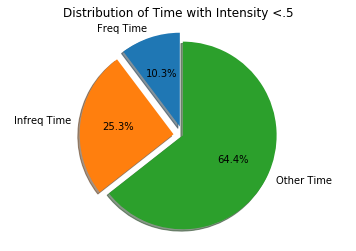

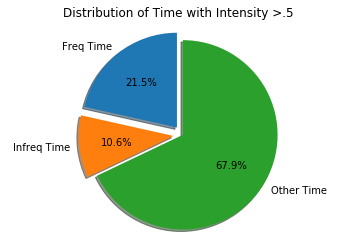

In [43]:

freq_time = [0,0]
infreq_time = [0,0]
other_time = [0,0]
for day in browser_days:
    if day[INTENSITY] <.5:
        freq_time[0] += math.exp(day[FREQ_TIME])
        infreq_time[0] += math.exp(day[INFREQ_TIME])
        other_time[0] += math.exp(day[OTHER_TIME])
    elif day[INTENSITY] > .5:
        freq_time[1] += math.exp(day[FREQ_TIME])
        infreq_time[1] += math.exp(day[INFREQ_TIME])
        other_time[1] += math.exp(day[OTHER_TIME])   
for i in range(0,2):
    pyplot.figure(765 + i)
    labels = 'Freq Time', 'Infreq Time', 'Other Time'
    sizes = [freq_time[i], infreq_time[i], other_time[i]]
    explode = (0.1, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    pyplot.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    pyplot.title("Distribution of Time with Intensity " + ("<" if i == 0 else ">") + ".5")

-0.5896299050985783


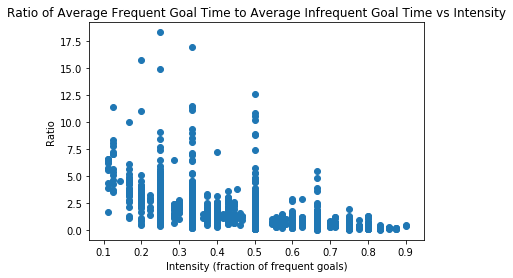

In [44]:
intensities = []
avg_freq_time = []
avg_infreq_time = []
ratio = []
from scipy import stats
for item in browser_days:
    if item[AVG_INFREQ_TIME] > 0 and item[AVG_FREQ_TIME] > 0:
        intensities.append(item[INTENSITY])
        avg_freq_time.append(item[AVG_FREQ_TIME])
        avg_infreq_time.append(item[AVG_INFREQ_TIME])
        ratio.append(item[AVG_FREQ_TIME]/item[AVG_INFREQ_TIME])
pyplot.figure(6246)
pyplot.title("Ratio of Average Frequent Goal Time to Average Infrequent Goal Time vs Intensity")
pyplot.xlabel("Intensity (fraction of frequent goals)")
pyplot.ylabel("Ratio")
pyplot.scatter(intensities, ratio)
slope, intercept, r_value, p_value, std_err = stats.linregress(intensities,ratio)
print(r_value)

<BarContainer object of 2 artists>

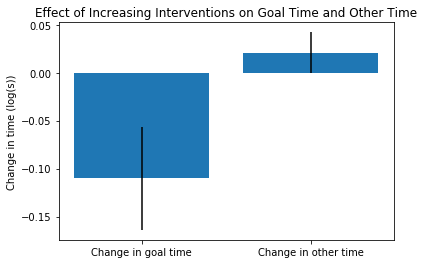

In [45]:
# Now let's try to generate that graph we made for Android -> change in time when goal changes frequency setting
user_goal_freq_avg = {}
for day in browser_days:
    user = day[HASH]
    if user not in user_goal_freq_avg:
        user_goal_freq_avg[user] = {}
    for goal_data in day[GOAL_TIMES]:
        if goal_data['goal'] != "www":
            if goal not in user_goal_freq_avg[user]:
                user_goal_freq_avg[user][goal] = {"time": {"frequent": [], "infrequent": []}, "other": {"frequent": [], "infrequent": []}}
            if (math.exp(day[TOTAL_TIME]) - math.exp(goal_data["time"])) > 0:
                user_goal_freq_avg[user][goal]["time"][goal_data["frequency"]].append(goal_data["time"])
                user_goal_freq_avg[user][goal]["other"][goal_data["frequency"]].append(math.log(math.exp(day[TOTAL_TIME]) - math.exp(goal_data["time"])))
change_in_goal_time = []
change_in_other_time = []
for user in user_goal_freq_avg:
    for goal in user_goal_freq_avg[user]:
        goal_data = user_goal_freq_avg[user][goal]
        if len(goal_data["time"]["frequent"]) > 0 and len(goal_data["time"]["infrequent"]) > 0:
            mean_freq_time = mean(goal_data["time"]["frequent"])
            mean_infreq_time = mean(goal_data["time"]["infrequent"])
            mean_freq_other = mean(goal_data["other"]["frequent"])
            mean_infreq_other = mean(goal_data["other"]["infrequent"])
            change_in_goal_time.append(mean_freq_time - mean_infreq_time)
            change_in_other_time.append(mean_freq_other - mean_infreq_other)
pyplot.title("Effect of Increasing Interventions on Goal Time and Other Time")
pyplot.ylabel("Change in time (log(s))")
pyplot.bar(["Change in goal time", "Change in other time"], [(mean(change_in_goal_time)), mean(change_in_other_time)] , .8, yerr=[sem(change_in_goal_time), sem(change_in_other_time)])
    